In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')


from numpy import ones,vstack
from numpy.linalg import lstsq

In [122]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

Coef:  [[0.21682055]]
intercept:  [0.32308489]
CSR5 Equation 1: y =  0.32308488958635806  +  0.2168205494492034  * x


<Figure size 432x288 with 0 Axes>

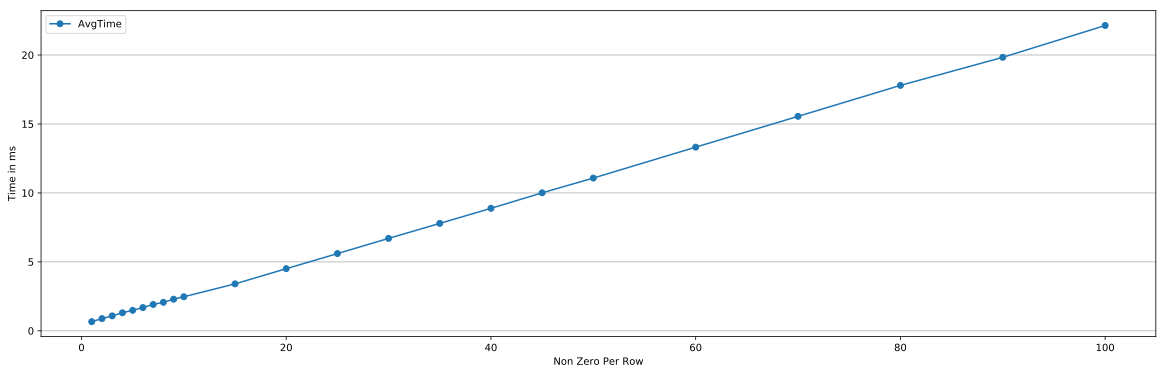

<Figure size 432x288 with 0 Axes>

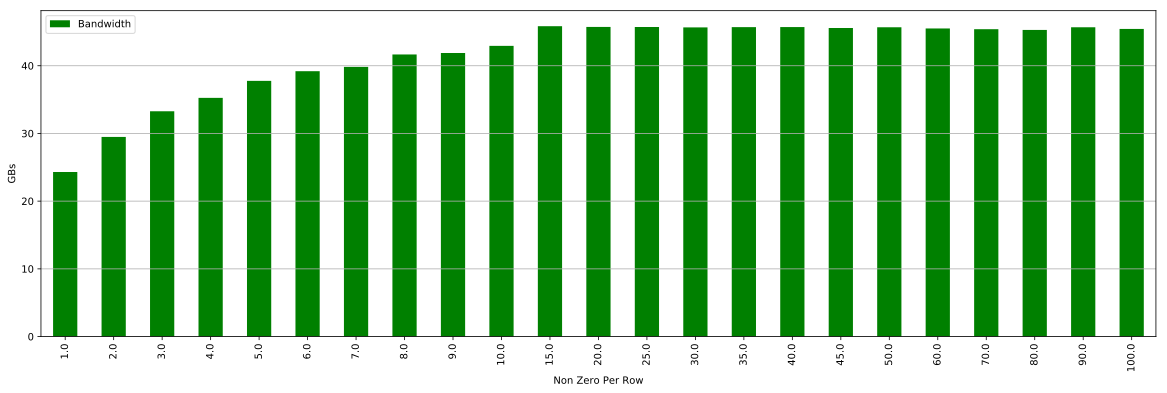

<Figure size 432x288 with 0 Axes>

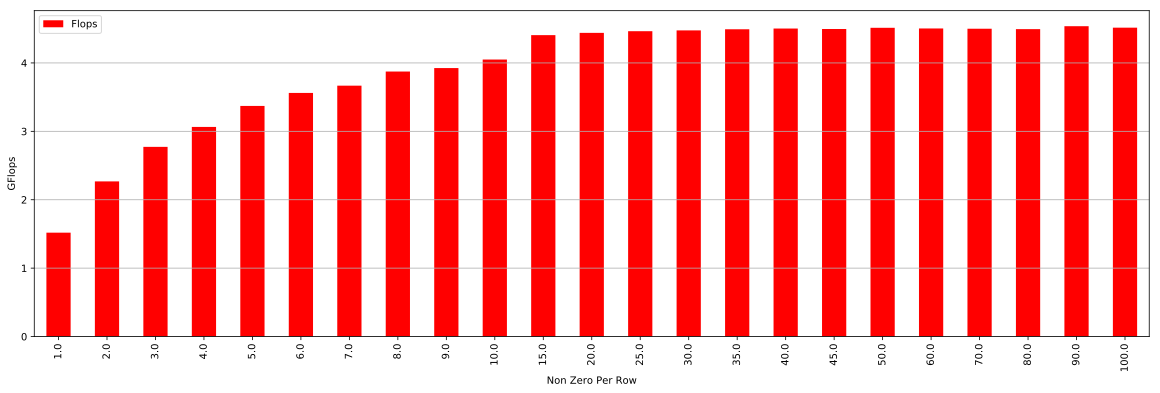

In [123]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_1 = LinearRegression()
reg_1.fit(data[["NonZeroPerRow"]], data[["AvgTime"]])
print('Coef: ', reg_1.coef_)
print('intercept: ', reg_1.intercept_)
print('CSR5 Equation 1: y = ', reg_1.intercept_[0], ' + ', reg_1.coef_[0][0], ' * x')


f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
# data

Coef:  [[0.00111848]]
intercept:  [-0.02865207]
CSR5 Equation 2: y =  -0.028652073388253374  +  0.0011184828061629659  * x


<Figure size 432x288 with 0 Axes>

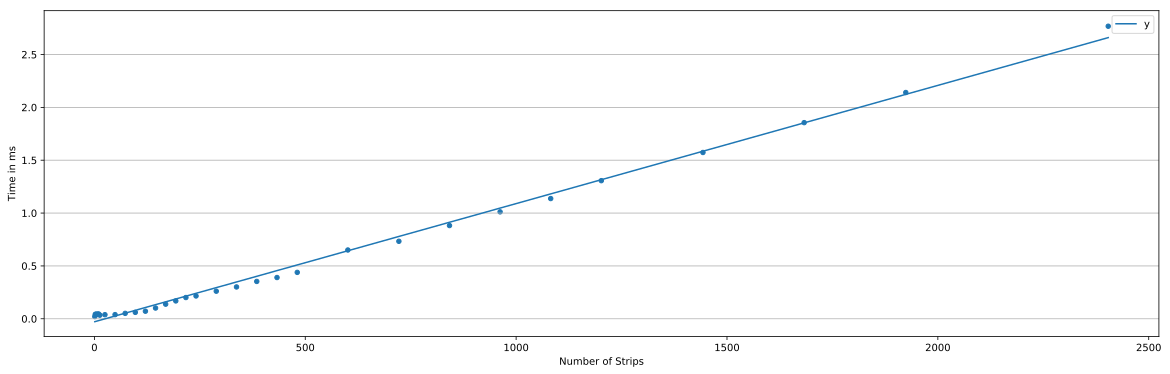

<Figure size 432x288 with 0 Axes>

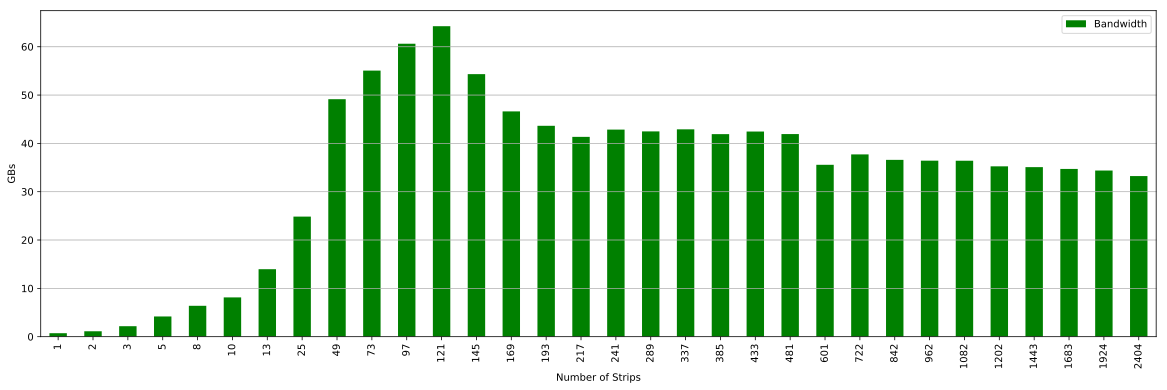

<Figure size 432x288 with 0 Axes>

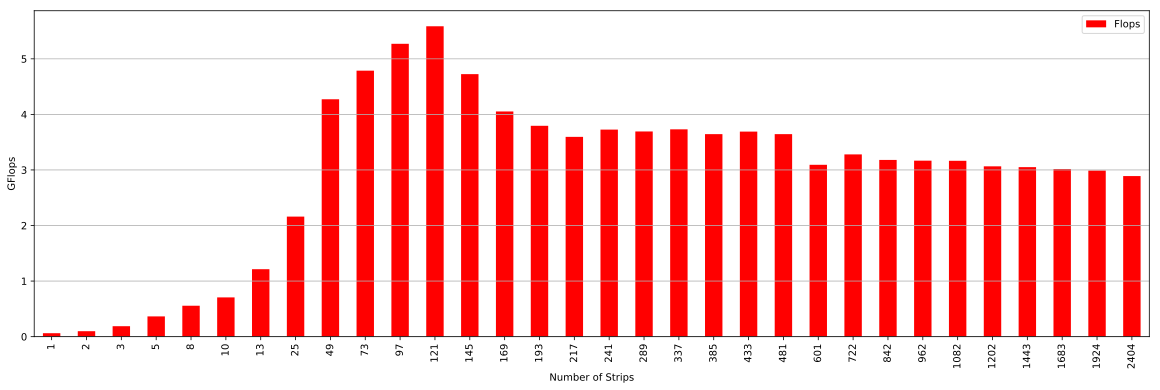

In [124]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips
data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_2 = LinearRegression()
reg_2.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_2.coef_)
print('intercept: ', reg_2.intercept_)
print('CSR5 Equation 2: y = ', reg_2.intercept_[0], ' + ', reg_2.coef_[0][0], ' * x')
pr = reg_2.predict(data[["Strips"]])

f = plt.figure()
ax = data.plot(kind="scatter", x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)

ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
# data

In [125]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
data = data[data["ValueType"] == 8]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
# data

Coef:  [[0.23563826]]
intercept:  [0.37617434]
CSR Equation 1: y =  0.37617433806274203  +  0.2356382625518279 * x


,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,1.0,500000,1000000,0.319809,200,500000,50.029876,3.126866,8
1,2.0,500000,1000000,0.488324,200,1000000,53.243309,4.095639,8
2,3.0,500000,1000000,0.740054,200,1500000,49.033917,4.086159,8
3,4.0,500000,1000000,0.963995,200,2000000,48.053641,4.178577,8
4,5.0,500000,1000000,1.280137,200,2500000,43.839032,3.914199,8
5,6.0,500000,1000000,1.521069,200,3000000,43.428900,3.948082,8
6,7.0,500000,1000000,1.834729,200,3500000,41.423005,3.815277,8
7,8.0,500000,1000000,1.934817,200,4000000,44.448640,4.134757,8
8,9.0,500000,1000000,2.391148,200,4500000,40.161438,3.765134,8
9,10.0,500000,1000000,2.614412,200,5000000,40.544767,3.824978,8


<Figure size 432x288 with 0 Axes>

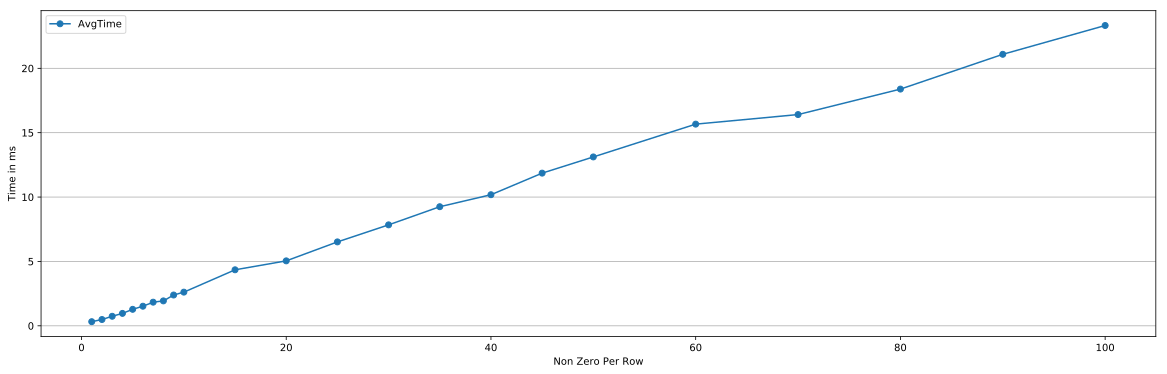

<Figure size 432x288 with 0 Axes>

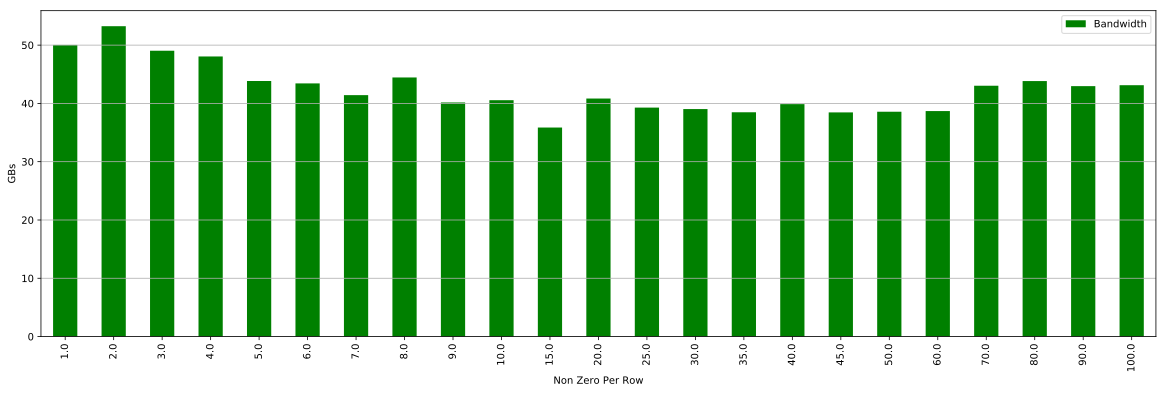

<Figure size 432x288 with 0 Axes>

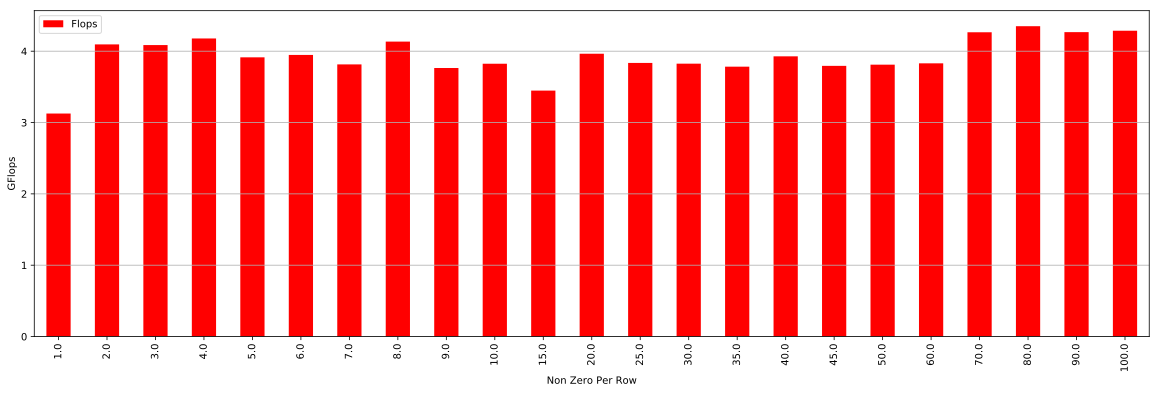

In [126]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

data = data[data["ValueType"] == 8]
# data = data[data["Partition"] == 416]
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
# Synthesis Data
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_3 = LinearRegression()
reg_3.fit(data[["NonZeroPerRow"]], data[["AvgTime"]])
print('Coef: ', reg_3.coef_)
print('intercept: ', reg_3.intercept_)
print('CSR Equation 1: y = ', reg_3.intercept_[0], ' + ', reg_3.coef_[0][0], '* x')


f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

Coef:  [[0.00086784]]
intercept:  [-0.07700344]
CSR Equation 2: y =  -0.07700343703503154  +  0.0008678400118484485  * x
W:  0.0008678400118484487  C:  -0.07700343703503197
A:  0.061726785714285706  ->P:  0.06902733418946662
A:  0.08284964285714287  ->P:  0.08988887293582355
A:  0.10547714285714285  ->P:  0.11075041168218049
A:  0.1285389285714286  ->P:  0.1316119504285374
A:  0.17406964285714285  ->P:  0.17333502792125127
A:  0.24076964285714286  ->P:  0.2150581054139652
A:  0.29891249999999997  ->P:  0.25678118290667906
A:  0.3456542857142857  ->P:  0.29850426039939293
A:  0.36495249999999996  ->P:  0.3402273378921068
A:  0.4340275  ->P:  0.4445350316238915
A:  0.49888892857142864  ->P:  0.5488427253556762
A:  0.5959378571428572  ->P:  0.6531504190874609
A:  0.7014546428571429  ->P:  0.7574581128192456
A:  0.8750946428571428  ->P:  0.8617658065510303
A:  0.9639950000000003  ->P:  0.966073500282815
A:  1.2275524999999998  ->P:  1.1746888877463846
A:  1.35784375  ->P:  1.38330427520995

/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Strips,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,168.269231,70000,140000,0.061727,200,4.0,280000,104.835464,9.116122,8
1,192.307692,80000,160000,0.082850,200,4.0,320000,89.307869,7.765897,8
2,216.346154,90000,180000,0.105477,200,4.0,360000,78.502513,6.826302,8
3,240.384615,100000,200000,0.128539,200,4.0,400000,71.573813,6.223807,8
4,288.461538,120000,240000,0.174070,200,4.0,480000,63.423060,5.515047,8
5,336.538462,140000,280000,0.240770,200,4.0,560000,53.503045,4.652437,8
6,384.615385,160000,320000,0.298912,200,4.0,640000,49.305583,4.287441,8
7,432.692308,180000,360000,0.345654,200,4.0,720000,48.080168,4.180883,8
8,480.769231,200000,400000,0.364952,200,4.0,800000,50.714490,4.409955,8
9,600.961538,250000,500000,0.434028,200,4.0,1000000,53.348831,4.639028,8


<Figure size 432x288 with 0 Axes>

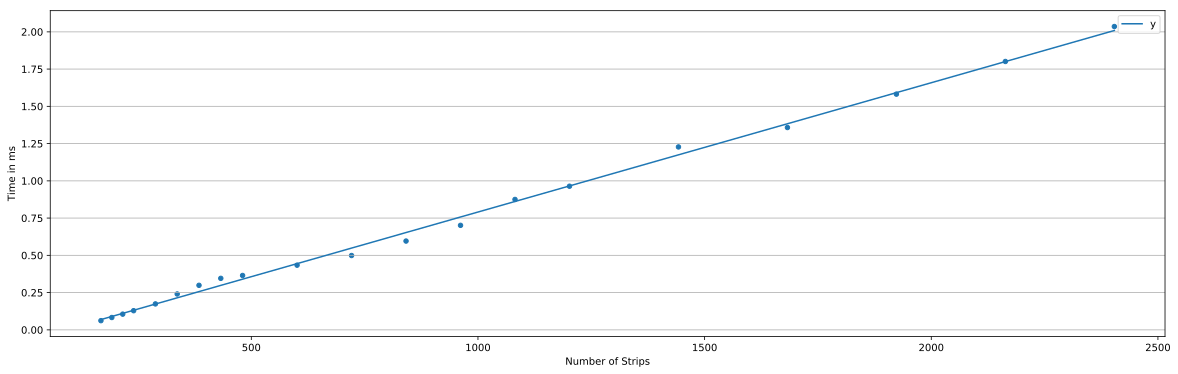

<Figure size 432x288 with 0 Axes>

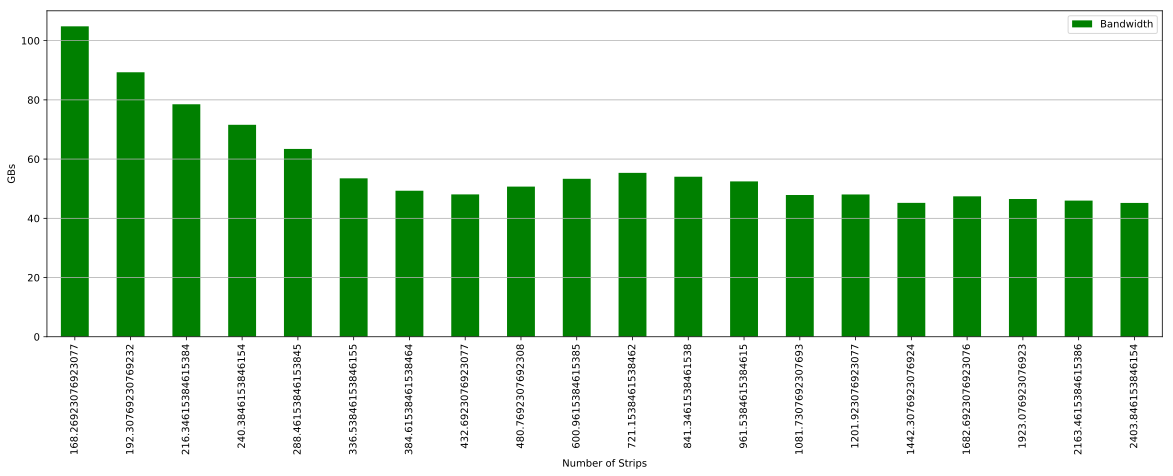

<Figure size 432x288 with 0 Axes>

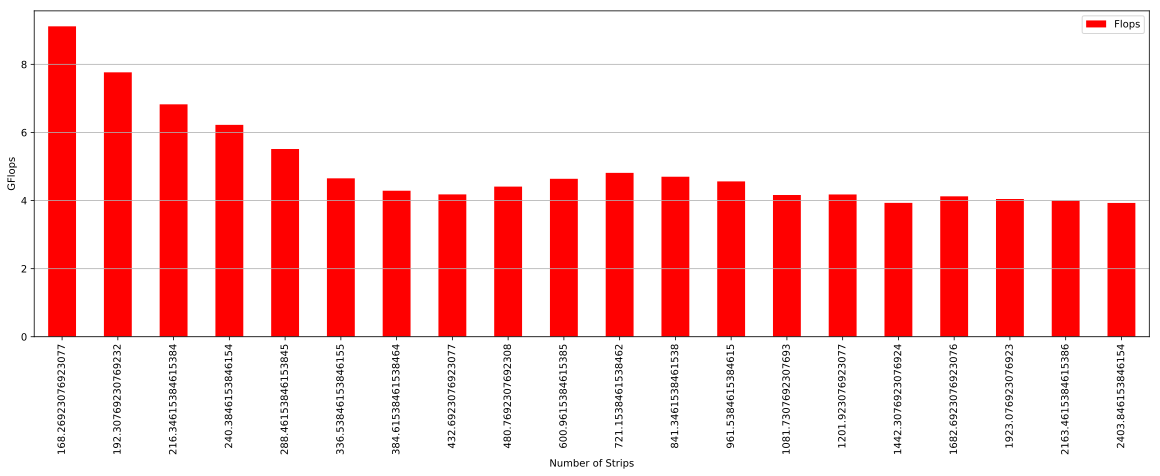

In [127]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(float(row['M'])/416)

data['Strips'] = strips

data = data[data["ValueType"] == 8]
data = data[data["Strips"] > 150]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_4 = LinearRegression()
reg_4.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_4.coef_)
print('intercept: ', reg_4.intercept_)
print('CSR Equation 2: y = ', reg_4.intercept_[0], ' + ', reg_4.coef_[0][0], ' * x')
pr = reg_4.predict(data[["Strips"]])
x1 = data["Strips"].values
y1 = data['AvgTime'].values
A1 = np.array([x1, np.ones(len(x1))])
w,c = np.linalg.lstsq(A1.T,y1)[0]
yp = (w*x1 + c)
j=0
print('W: ', w, ' C: ', c)
while j<len(y1):
    print('A: ', y1[j], ' ->P: ', yp[j])
    j = j+1

f = plt.figure()
# ax = data.plot(kind="line", marker='o', x="Strips", y="AvgTime", figsize=(20,6))

ax = data.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
x = np.linspace(0, 2404, 10)
a = 0.0006937507094729002
b = 0.008568
y = a * x + b
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [128]:
x

array([   0.        ,  267.11111111,  534.22222222,  801.33333333,
       1068.44444444, 1335.55555556, 1602.66666667, 1869.77777778,
       2136.88888889, 2404.        ])

In [129]:
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["M"] > 70000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
prediction = []
error = []
strips = []
y1 = reg_3.predict(rdata[['NonZeroPerRow']])
for index, row in rdata.iterrows():
    strips.append(float(row['M'])/416)
rdata['Strips'] = strips
y3 = reg_4.predict(rdata[['Strips']])
#     T1 =  0.37617433806274203  +  0.2356382625518279 * row['NonZeroPerRow']
#     T2 = 0.963995
#     T3 = -0.03264406049395996  +  0.0008368242441198094 * float(row['M'])/416
i=0

while i<len(y1):
    T2 = 0.963995
    T0 = (y1[i]/T2) * y3[i]
    prediction.append(T0[0])
    i = i+1
    
rdata['Prediction'] = prediction
for index, row in rdata.iterrows():
    error.append(row['Prediction']/row['AvgTime'])
rdata['Error'] = error
rdata

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType,Strips,Prediction,Error
0,3.835031,80209,80209,1.501255,200,307604,4.786615,0.413905,8,192.810096,0.119920,0.079880
1,7.986301,74752,74752,0.149440,200,596992,85.899821,7.989722,8,179.692308,0.184910,1.237353
2,3.186670,479119,515905,0.408417,200,1526794,88.843678,7.476634,8,1151.728365,1.078576,2.640865
3,3.809862,1447360,1447360,1.137625,200,5514242,112.320408,9.703824,8,3479.230769,3.888411,3.418007
4,2.999340,21198119,21198119,19.015800,200,63580358,80.248261,6.687110,8,50957.016827,49.592252,2.607950
5,14.734162,5363260,5363260,24.616527,200,79023142,66.817812,6.420335,8,12892.451923,44.355576,1.801862
6,19.243892,5154859,5154859,13.206278,200,99199551,154.942704,15.025785,8,12391.487981,54.389755,4.118477
7,76.281421,3072441,3072441,84.017365,200,234370166,56.230702,5.579187,8,7385.675481,120.549559,1.434817
8,16.096433,18520486,18520486,52.855995,200,298113762,117.006994,11.280225,8,44520.399038,166.763443,3.155053


In [130]:
-0.055455801466827714  +  0.00085334532045699  * x

array([-0.0554558 ,  0.17248222,  0.40042023,  0.62835825,  0.85629627,
        1.08423428,  1.3121723 ,  1.54011032,  1.76804833,  1.99598635])

Coef:  [[0.0008578]]
intercept:  [-0.25586888]
CSR Equation 2: y =  -0.25586888248705497  +  0.0008578042991216409  * x
W:  0.0008578042991216406  C:  -0.2558688824870552


/home/maruf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Strips,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,481,200000,400000,0.214020,200,4.0,800000,52.341021,7.477286,4
1,601,250000,500000,0.327952,200,4.0,1000000,42.831205,6.118742,4
2,722,300000,600000,0.416104,200,4.0,1200000,40.639745,5.805677,4
3,842,350000,700000,0.475296,200,4.0,1400000,41.459410,5.922772,4
4,962,400000,800000,0.544008,200,4.0,1600000,41.247931,5.892560,4
5,1082,450000,900000,0.628031,200,4.0,1800000,40.125426,5.732203,4
6,1202,500000,1000000,0.735639,200,4.0,2000000,38.348891,5.478412,4
7,1443,600000,1200000,0.955753,200,4.0,2400000,35.314541,5.044934,4
8,1683,700000,1400000,1.188365,200,4.0,2800000,33.183974,4.740567,4
9,1924,800000,1600000,1.397757,200,4.0,3200000,32.186201,4.598028,4


<Figure size 432x288 with 0 Axes>

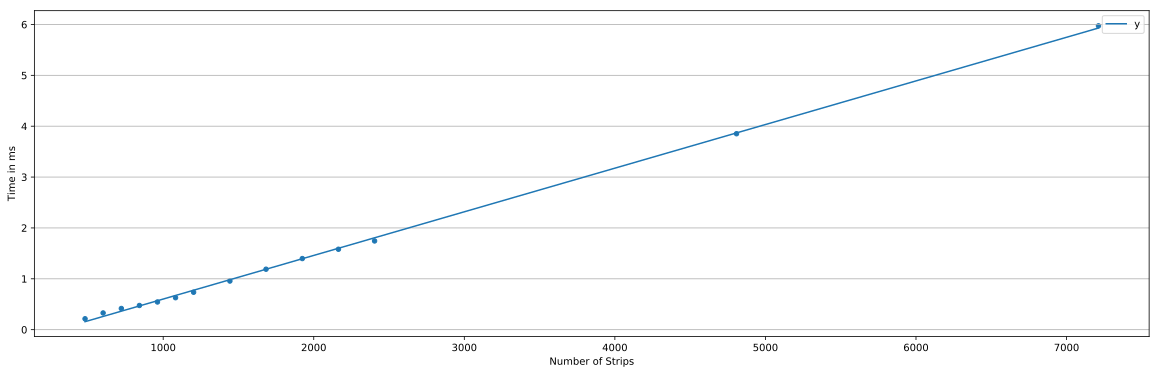

<Figure size 432x288 with 0 Axes>

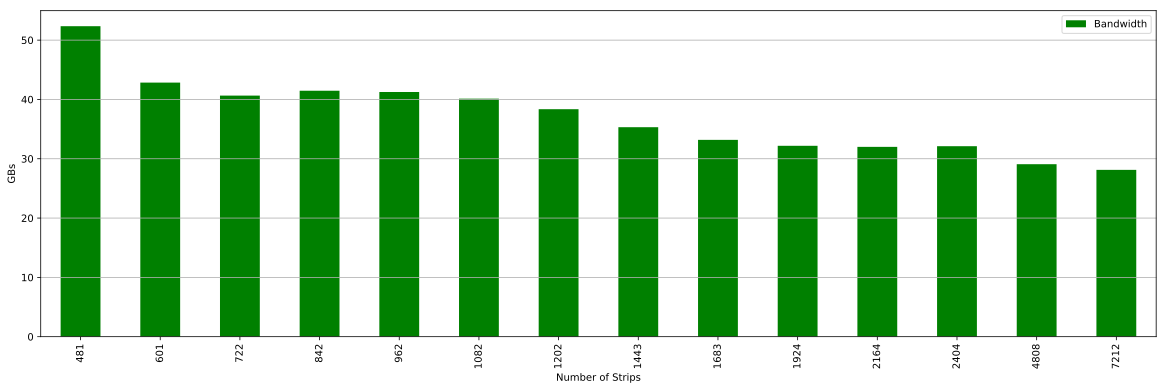

<Figure size 432x288 with 0 Axes>

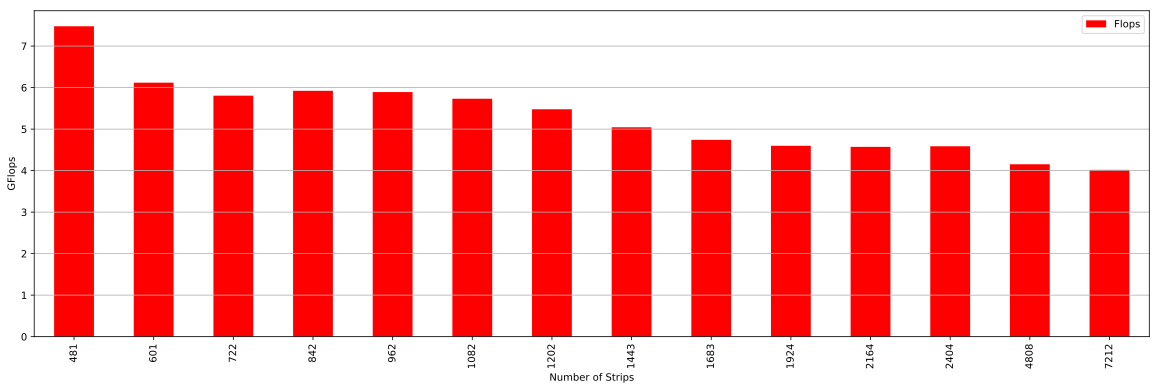

In [135]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_4NNZ_PER_ROW_4.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips

data = data[data["ValueType"] == 4]
data = data[data["Strips"] > 450]
# Synthesis Data
data = data[data["NonZeroPerRow"] == 4]
data = data.groupby('Strips').mean()
data = data.reset_index() 
data = data.sort_values(by=["Strips"])
data = data.reset_index(drop=True) 

#Linear Regression
reg_4 = LinearRegression()
reg_4.fit(data[["Strips"]], data[["AvgTime"]])
print('Coef: ', reg_4.coef_)
print('intercept: ', reg_4.intercept_)
print('CSR Equation 2: y = ', reg_4.intercept_[0], ' + ', reg_4.coef_[0][0], ' * x')
pr = reg_4.predict(data[["Strips"]])
x1 = data["Strips"].values
y1 = data['AvgTime'].values
A1 = np.array([x1, np.ones(len(x1))])
w,c = np.linalg.lstsq(A1.T,y1)[0]
yp = (w*x1 + c)
j=0
print('W: ', w, ' C: ', c)

f = plt.figure()
# ax = data.plot(kind="line", marker='o', x="Strips", y="AvgTime", figsize=(20,6))

ax = data.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['x'] = data["Strips"]
df['y'] = pr
df.plot(kind='line', x='x', y='y', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

# CSR CUDA Model

Linear Regression for NZ per Row vs Time
Coef:  [[0.19767966]]
intercept:  [0.31674303]
CSR Equation 1: y =  0.3167430278279726  +  0.19767965518209052 * x
Linear Regression for Strips vs Time
Coef:  [[0.00087986]]
intercept:  [-0.27656369]
CSR Equation 2: y =  -0.2765636929918269  +  0.0008798590275335455  * x


,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType,Strips,Prediction,Error
0,3.186670,479119,515905,0.332188,200,1526794,56.180821,9.472352,4,1152,0.948478,2.855242
1,3.809862,1447360,1447360,0.945790,200,5514242,65.034673,11.665704,4,3480,4.050862,4.283046
2,2.999340,21198119,21198119,16.197578,200,63580358,47.107105,7.850608,4,50958,55.099619,3.401720
3,14.734162,5363260,5363260,19.927007,200,79023142,34.954786,7.931261,4,12893,48.585119,2.438154
4,19.243892,5154859,5154859,10.752387,200,99199551,79.585022,18.457548,4,12392,59.527879,5.536248
5,76.281421,3072441,3072441,70.931723,200,234370166,26.953111,6.608331,4,7386,130.220451,1.835856
6,16.096433,18520486,18520486,41.924305,200,298113762,62.187700,14.221634,4,44521,184.986674,4.412397


<Figure size 432x288 with 0 Axes>

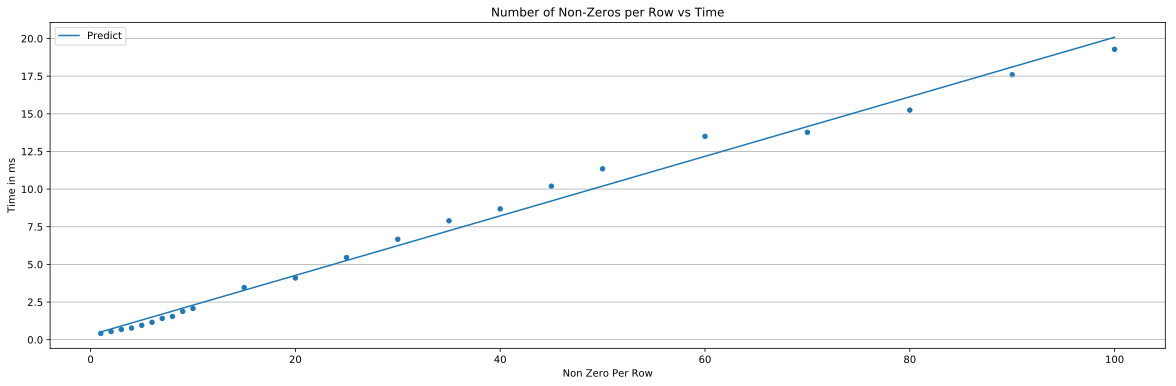

<Figure size 432x288 with 0 Axes>

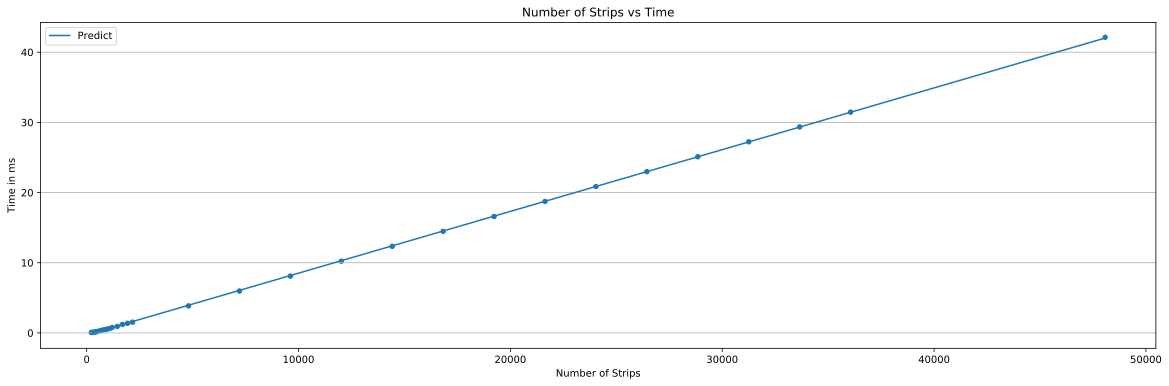

<Figure size 432x288 with 0 Axes>

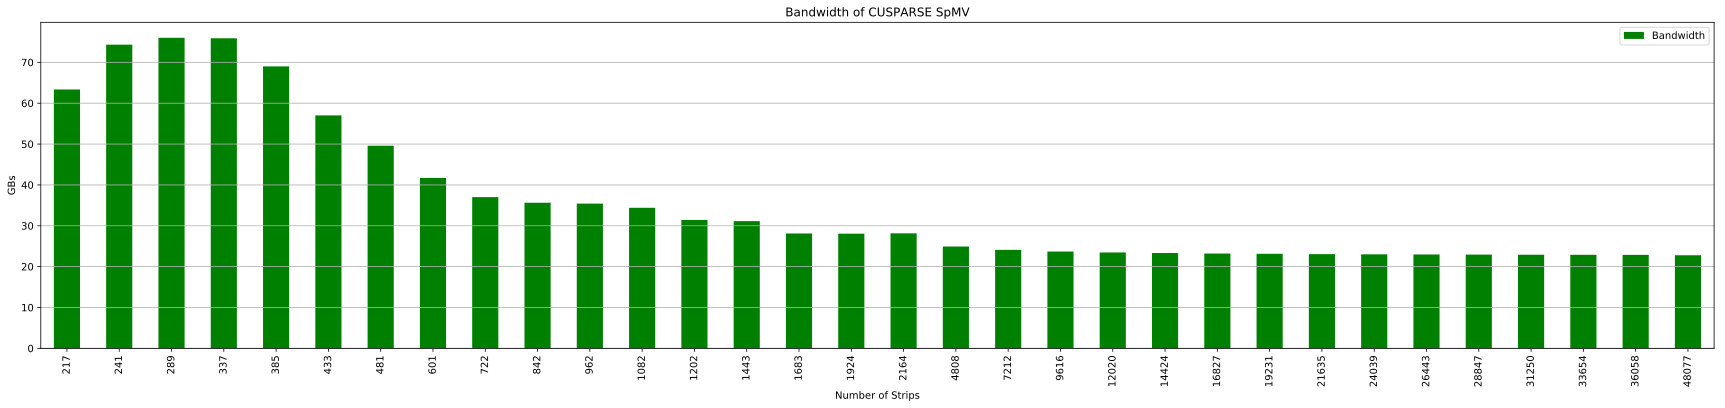

<Figure size 432x288 with 0 Axes>

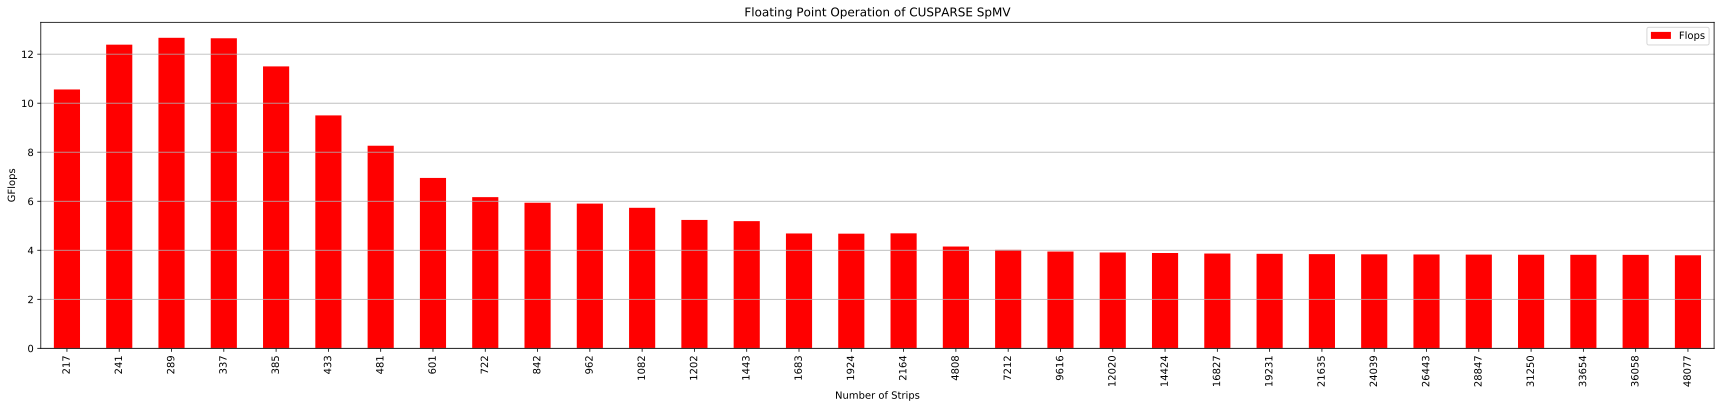

In [187]:
# pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_CUDA_SpMV_CUSP_Model_for_Floating_Point_4.pdf")
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_CUDA_SpMV_CUSPARSE_Model_for_Floating_Point_4.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_CUDA_SpMV.csv")

strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips

data = data[data["ValueType"] == 4]
data = data[data["Strips"] > 200]
data = data[data["Type"] == "CUSPARSE"]
# data = data[data["Type"] == "CUSP"]

# Synthesis Data To Model NNZ Per Row vs Time
nzData = data[data["M"] == 500000]
nzData = nzData[nzData["N"] == 1000000]
nzData = nzData.groupby('NonZeroPerRow').mean()
nzData = nzData.reset_index() 
nzData = nzData.sort_values(by=["NonZeroElements"])
nzData = nzData.reset_index(drop=True) 

# Synthesis Data To Model Strips vs Time
stData = data[data["NonZeroPerRow"] == 4]
stData = stData.groupby('Strips').mean()
stData = stData.reset_index() 
stData = stData.sort_values(by=["Strips"])
stData = stData.reset_index(drop=True) 


#Linear Regression for NZ per Row vs Time
nzModel = LinearRegression()
nzModel.fit(nzData[["NonZeroPerRow"]], nzData[["AvgTime"]])
print("Linear Regression for NZ per Row vs Time")
print('Coef: ', nzModel.coef_)
print('intercept: ', nzModel.intercept_)
print('CSR Equation 1: y = ', nzModel.intercept_[0], ' + ', nzModel.coef_[0][0], '* x')
nzPredict = nzModel.predict(nzData[["NonZeroPerRow"]])


#Linear Regression for Strips vs Time
stModel = LinearRegression()
stModel.fit(stData[["Strips"]], stData[["AvgTime"]])
print("Linear Regression for Strips vs Time")
print('Coef: ', stModel.coef_)
print('intercept: ', stModel.intercept_)
print('CSR Equation 2: y = ', stModel.intercept_[0], ' + ', stModel.coef_[0][0], ' * x')
stPredict = stModel.predict(stData[["Strips"]])


f = plt.figure()
ax = nzData.plot(kind="scatter", x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
nzDf = pd.DataFrame()
nzDf['NonZeroPerRow'] = nzData["NonZeroPerRow"]
nzDf['Predict'] = nzPredict
nzDf.plot(kind='line', x='NonZeroPerRow', y='Predict', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Non Zero Per Row")
ax.set_title("Number of Non-Zeros per Row vs Time")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = stData.plot(kind='scatter', x="Strips", y="AvgTime", figsize=(20,6))
df = pd.DataFrame()
df['Strips'] = stData["Strips"]
df['Predict'] = stPredict
df.plot(kind='line', x='Strips', y='Predict', ax=ax)
ax.set_ylabel("Time in ms")
ax.set_xlabel("Number of Strips")
ax.set_title("Number of Strips vs Time")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = stData.plot(kind="bar", x="Strips", y="Bandwidth", color='g', figsize=(30,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Number of Strips")
ax.set_title("Bandwidth of CUSPARSE SpMV")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = stData.plot(kind="bar", x="Strips", y="Flops", color='r', figsize=(30,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Number of Strips")
ax.set_title("Floating Point Operation of CUSPARSE SpMV")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()

rdata = data[data["M"] != 500000]
# rdata = rdata[rdata["M"] > 70000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
prediction = []
error = []
strips = []
y1 = nzModel.predict(rdata[['NonZeroPerRow']])
y3 = stModel.predict(rdata[['Strips']])
i=0
T2 = 0.735639
while i<len(y1):
    T0 = (y1[i]/T2) * y3[i]
    prediction.append(T0[0])
    i = i+1
    
rdata['Prediction'] = prediction
for index, row in rdata.iterrows():
    error.append(row['Prediction']/row['AvgTime'])
rdata['Error'] = error
rdata.to_csv("CSR_CUDA_SpMV_Prediction.csv")
rdata

,Name,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType,Strips
0,linverse_0,11999,11999,0.030613,200,7.998750,95977,40.763863,6.271268,4,29
1,ex11_0,16614,16614,0.148658,200,66.025521,1096948,92.204769,15.213841,4,40
2,finan512_0,74752,74752,0.137470,200,7.986301,596992,58.323010,8.971582,4,180
3,circuit_4_0,80209,80209,1.022127,200,3.835031,307604,4.239555,0.601951,4,193
4,neos_0,479119,515905,0.382887,200,3.186670,1526794,59.784043,8.240130,4,1152
5,Hamrle3_0,1447360,1447360,1.360602,200,3.809862,5514242,57.152847,8.106893,4,3480
6,com,3072441,3072441,73.372440,200,76.281421,234370166,38.666051,6.388509,4,7386
7,cage15_0,5154859,5154859,34.895958,200,19.243892,99199551,35.294977,5.685532,4,12392
8,ljournal,5363260,5363260,22.554060,200,14.734162,79023142,43.947333,7.007492,4,12893
9,uk,18520486,18520486,52.742005,200,16.096433,298113762,70.637921,11.304776,4,44521


<Figure size 432x288 with 0 Axes>

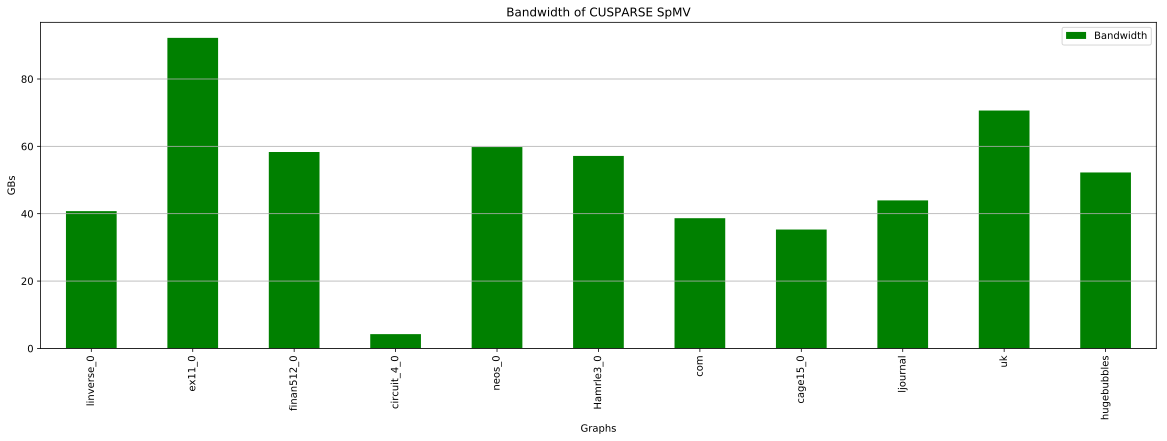

<Figure size 432x288 with 0 Axes>

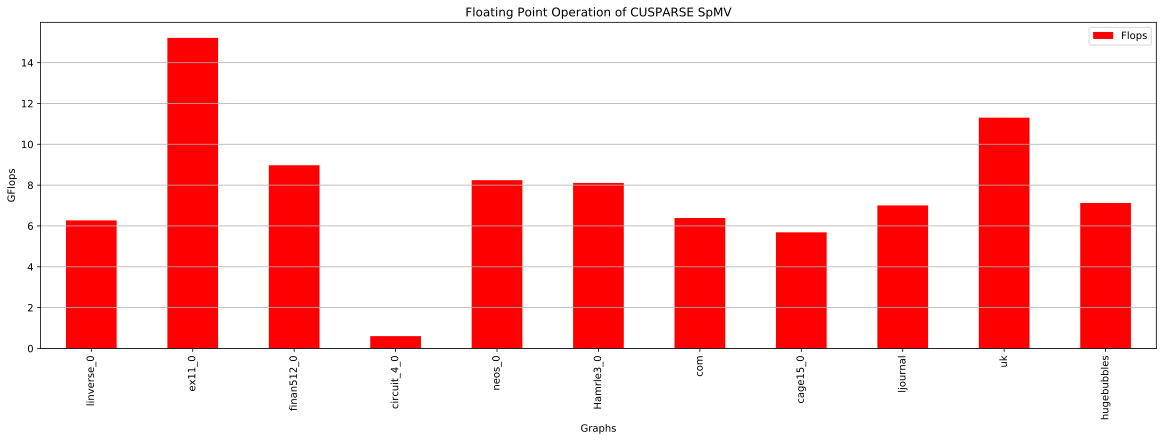

In [189]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_CUDA_SpMV_CUSP_Model_on_Real_Data.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_CUDA_SpMV.csv")
strips = []
for index, row in data.iterrows():
    strips.append(math.ceil(float(row['M'])/416))

data['Strips'] = strips

# data = data[data["Type"] == "CUSPARSE"]
data = data[data["Type"] == "CUSP"]
rdata = data[data["M"] != 500000]
# rdata = rdata[rdata["M"] > 70000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata[rdata['NonZeroPerRow'] != 4]
rdata = rdata.groupby('Name').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["Strips", "NonZeroElements", "NonZeroPerRow"])
rdata = rdata.reset_index(drop=True) 
f = plt.figure()
ax = rdata.plot(kind="bar", x="Name", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GBs")
ax.set_xlabel("Graphs")
ax.set_title("Bandwidth of CUSPARSE SpMV")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = rdata.plot(kind="bar", x="Name", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("GFlops")
ax.set_xlabel("Graphs")
ax.set_title("Floating Point Operation of CUSPARSE SpMV")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
rdata

In [141]:
y3

array([[ 0.73232167],
       [ 2.72929008],
       [43.45612259],
       [10.80380195],
       [10.37404199],
       [ 6.07987367],
       [37.93443632]])

In [142]:
stData

,Strips,M,N,AvgTime,TotalRun,NonZeroPerRow,NonZeroElements,Bandwidth,Flops,ValueType
0,481,200000,400000,0.214020,200,4.0,800000,52.341021,7.477286,4
1,601,250000,500000,0.327952,200,4.0,1000000,42.831205,6.118742,4
2,722,300000,600000,0.416104,200,4.0,1200000,40.639745,5.805677,4
3,842,350000,700000,0.475296,200,4.0,1400000,41.459410,5.922772,4
4,962,400000,800000,0.544008,200,4.0,1600000,41.247931,5.892560,4
5,1082,450000,900000,0.628031,200,4.0,1800000,40.125426,5.732203,4
6,1202,500000,1000000,0.735639,200,4.0,2000000,38.348891,5.478412,4
7,1443,600000,1200000,0.955753,200,4.0,2400000,35.314541,5.044934,4
8,1683,700000,1400000,1.188365,200,4.0,2800000,33.183974,4.740567,4
9,1924,800000,1600000,1.397757,200,4.0,3200000,32.186201,4.598028,4


In [154]:
nzData.to_csv("CSR_CUDA_NNZ_PER_ROW.csv")

In [156]:
stData.to_csv("CSR_CUDA_STRIPS.csv")